In [23]:
#pip install sysidentpy

In [24]:
#pip install torch

In [25]:
#pip install sklearn

In [26]:
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.metrics import mean_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.neural_network import NARXNN
from sklearn.model_selection import train_test_split
from sktime.forecasting.model_selection import temporal_train_test_split
loss = mean_squared_error
import math

In [27]:
data = pd.read_csv("/home/studio-lab-user/sagemaker-studiolab-notebooks/DATA/process_data_Main.csv", sep=",",encoding='latin-1')
data['Month_Year'] = data['Month'].astype(str) + '/'+ data['Year'].astype(str) 

data_pred = pd.read_csv("/home/studio-lab-user/sagemaker-studiolab-notebooks/DATA/process_data_Forecast.csv", sep=",",encoding='latin-1')
data_pred['Month_Year'] = data_pred['Month'].astype(str) + '/'+ data_pred['Year'].astype(str) 

In [28]:
#data_state = data.loc[(data['State'] == 'Bihar') & (data['Month'] >= 5) & (data['Month'] <= 10)]
data_state = data.loc[(data['State'] == 'Bihar')]
data_statepred = data_pred.loc[(data_pred['State'] == 'Bihar')]

In [29]:
y = data_state['Rain']
y_pred = data_statepred['Rain']
x_Month_Year = data_statepred['Month_Year'] 

In [30]:
print(len(y))

1386


In [31]:
y_train, y_test = temporal_train_test_split(y, test_size=124)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
x_train = np.zeros_like(y_train)
x_test = np.zeros_like(y_test)



y_pred = y_pred.values.reshape(-1, 1)
x_pred = np.zeros_like(y_pred)
x_Month_Year = x_Month_Year.values.reshape(-1, 1)

In [32]:
print(len(y_test))

124


In [33]:
narx_net = NARXNN(ylag=11,
                  xlag=1,
                  loss_func='mse_loss',
                  optimizer='Adam',
                  epochs=900,
                  verbose=True,
                  optim_params={'betas': (0.9, 0.999), 'eps': 1e-05} # optional parameters of the optimizer
)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Function __init__ has been deprecated since v0.1.7.
 Use NARXNN(ylag=2, xlag=2, basis_function='Some basis function') instead.This module was deprecated in favor of NARXNN(ylag=2, xlag=2, basis_function='Some basis function') module into which all the refactored classes and functions are moved.
 This feature will be removed in version v0.2.0.
  warnings.warn(message, FutureWarning)


In [34]:
class NARX(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(12, 20)
        self.lin2 = nn.Linear(20, 20)
        self.lin3 = nn.Linear(20, 20)
        self.lin4 = nn.Linear(20, 20)
        self.lin5 = nn.Linear(20, 1)
        self.relu = nn.ReLU()

    def forward(self, xb):
        z = self.lin(xb)
        z = self.relu(z)
        z = self.lin2(z)
        z = self.relu(z)
        z = self.lin3(z)
        z = self.relu(z)
        z = self.lin4(z)
        z = self.relu(z)
        z = self.lin5(z)
        return z


In [35]:
narx_net.net = NARX() 

In [36]:
train_dl = narx_net.data_transform(x_train, y_train)
valid_dl = narx_net.data_transform(x_test, y_test)

In [37]:
narx_net.fit(train_dl, valid_dl)

12-30 21:18:23 - INFO - Train metrics: 7047.9150043246655 | Validation metrics: 5056.109312344442
12-30 21:18:23 - INFO - Train metrics: 4554.346532929906 | Validation metrics: 3443.7613428166483
12-30 21:18:24 - INFO - Train metrics: 4340.458229705298 | Validation metrics: 3123.7421053996127
12-30 21:18:24 - INFO - Train metrics: 4111.347902732501 | Validation metrics: 2938.6107210142422
12-30 21:18:24 - INFO - Train metrics: 3997.235284428707 | Validation metrics: 2864.3135727063745
12-30 21:18:24 - INFO - Train metrics: 3967.6027111904227 | Validation metrics: 2806.6046315421045
12-30 21:18:24 - INFO - Train metrics: 4023.6170733335207 | Validation metrics: 2822.220157589533
12-30 21:18:24 - INFO - Train metrics: 3893.690136757781 | Validation metrics: 2757.2485243535675
12-30 21:18:24 - INFO - Train metrics: 3751.0573207449665 | Validation metrics: 2754.8147880081583
12-30 21:18:24 - INFO - Train metrics: 3701.7141390403303 | Validation metrics: 2752.5830996353016
12-30 21:18:24 - 

In [38]:
print(y_pred.reshape(1,-1)[0])

[356.4 150.8 357.9  60.8   0.    0.    0.7   0.   22.8  21.8  79.7  84.6
 379.9 342.8 129.6  50.1   0.    0. ]


12-30 21:18:57 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
12-30 21:18:57 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
12-30 21:18:57 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
12-30 21:18:57 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
12-30 21:18:57 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be p

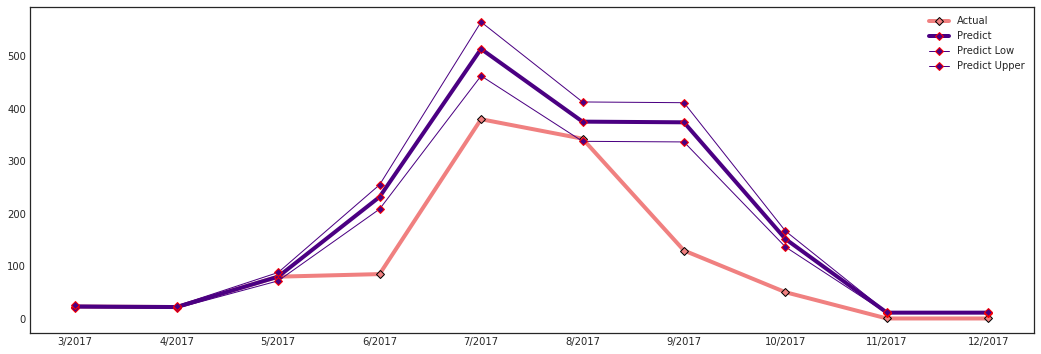

['3/2017' '4/2017' '5/2017' '6/2017' '7/2017' '8/2017' '9/2017' '10/2017'
 '11/2017' '12/2017']


In [39]:

yhat_pred = narx_net.predict(x_pred, y_pred)
#print(y_pred)
#print(yhat_pred)
#print(yhat_pred * 0.95)
#print(yhat_pred * 1.05)

#ee, ex, extras, lam = narx_net.residuals(x_pred,y_pred, yhat_pred)
#narx_net.plot_result(y_pred, yhat_pred, ee, ex)
#narxnet_loss = loss(pd.Series(y_pred.flatten()[narx_net.max_lag:]), pd.Series(yhat_pred.flatten()[narx_net.max_lag:]))
#print(f'RMSE ====>    {math.sqrt(narxnet_loss)}')

#plt.bar([1,2,3,4,5,6,7],y_pred[11:18])
#lt.bar([1,2,3,4,5,6],yhat_pred[11:18])
#plt.bar([1,2,3,4,5,6],yhat_pred[11:18] * 0.95)
#plt.bar([1,2,3,4,5,6],yhat_pred[11:18] * 1.05)

plt.figure(figsize=(18,6))

plt.plot(x_Month_Year[8:18,0],y_pred[8:18], label='Actual',color='lightcoral', marker='D', markeredgecolor='black',linewidth=4)
plt.plot(x_Month_Year[8:18,0],yhat_pred[8:18], label='Predict', color='#4b0082', marker='D', markeredgecolor='red',linewidth=4)
plt.plot(x_Month_Year[8:18,0],yhat_pred[8:18] * 0.90, label='Predict Low', color='#4b0082', marker='D', markeredgecolor='red',linewidth=1)
plt.plot(x_Month_Year[8:18,0],yhat_pred[8:18] * 1.10, label='Predict Upper', color='#4b0082', marker='D', markeredgecolor='red',linewidth=1)

#plt.bar(locs+2*width, yhat_pred.reshape(1,-1)[0] * 0.95, width=width, color="black", label='Predict Lower')
#plt.bar(locs+4*width, yhat_pred.reshape(1,-1)[0] * 1.05, width=width, color="black", label='Predict Upper')

plt.legend()

#plt.xticks([1.25, 2.25, 3.25],          [r'$2000$', r'$2005$', r'$2010$'])

plt.show()

print(x_Month_Year[8:18,0])

In [40]:
data_floods = pd.read_csv("/home/studio-lab-user/sagemaker-studiolab-notebooks/DATA/Floods_Bihar.csv", sep=",",encoding='latin-1')
data_floods['Month_Year'] = data_floods['Month'].astype(str) + '/'+ data_floods['Year'].astype(str) 

print(data_floods.head())

   Year  Month  Flood           Area Month_Year
0  1998      7      1  LALBEGHIAGHAT     7/1998
1  2002      7      1  LALBEGHIAGHAT     7/2002
2  2003      7      1  LALBEGHIAGHAT     7/2003
3  2004      7      1  LALBEGHIAGHAT     7/2004
4  1998      8      1  LALBEGHIAGHAT     8/1998


In [41]:
print(data_state.head())

       State  Year  Month  Rain Month_Year
10956  Bihar  1901      1  51.8     1/1901
10957  Bihar  1901      2  19.6     2/1901
10958  Bihar  1901      3  11.9     3/1901
10959  Bihar  1901      4   1.1     4/1901
10960  Bihar  1901      5  65.6     5/1901


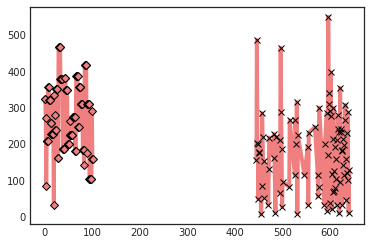

In [42]:
data_rainperiod = data_state.loc[(data_state['State'] == 'Bihar') & (data_state['Month'] >= 6) & (data_state['Month'] <= 10)]
int_df = pd.merge(data_rainperiod, data_floods, how ='inner', on =['Month_Year'])
int_df2 = pd.merge(data_rainperiod, data_floods, how ='outer', on =['Month_Year'])
int_df2 = int_df2[int_df2['Flood'].isna()]
int_df2 = int_df2[(int_df2['Year_x'] >= 1990) & (int_df2['Year_x'] <= 2018)]
int_df2['Flood'] = 0


int_df.to_csv('/home/studio-lab-user/sagemaker-studiolab-notebooks/DATA/flood_data.csv',index=False)
int_df2.to_csv('/home/studio-lab-user/sagemaker-studiolab-notebooks/DATA/non-flood.csv',index=False)

plt.plot(int_df['Rain'], label='Actual',color='lightcoral', marker='D', markeredgecolor='black',linewidth=4)
plt.plot(int_df2['Rain'], label='Actual',color='lightcoral', marker='x', markeredgecolor='black',linewidth=4)

In [43]:
ind = data_floods.Month_Year.isin(data_state.Month_Year) & data_state.Month_Year.isin(data_floods.Month_Year)
for n in ind:
    print (n)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals